# HomeWork 9

### Name: Diana Dalenova
### Group: BDA-1901

### Description

The dataset is scraped from https://krisha.kz/, website for apartments' sales and rents. The dataset contains information of apartments for sales in new buildings in Nur-Sultan. Dataset size is 226. Web scaping was done by the 5th week.

Main variables of the dataset:
+ OwnerName - the name of the owner of apartment
+ Address - the address of the apartment
+ Complex - the name of the apartment's complex
+ Square - the amount of squares of the apartment
+ Rooms - number of rooms
+ Phone - the phone number of the owner
+ Price - price of the apartment (target variable)
+ Description - brief description of the apartment

### Introduction

In [1]:
#pip install missingno

In [2]:
#importing
import missingno as msno
import numpy as np
import pandas as pd
import math
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression #Pearson

In [3]:
krisha = pd.read_excel("krisha.xlsx")

In [4]:
krisha

,OwnerName,Address,Complex,Square,Rooms,Phone,Price,Description
0,Асем Тас 2,Туран 38/1,Асем Тас 2,101.10,3,+7 778 017 1147,44484000.0,"3-комнатная квартира, 101.1 м²"
1,Athletic,Туран — Улы Дала,Athletic,79.85,3,+7 778 021 1839,25552000.0,"3-комнатная квартира, 79.85 м²"
2,Atlant,Сарайшык 2 — Кунаева,Atlant,100.42,3,+7 778 021 1851,44929027.0,"3-комнатная квартира, 100.42 м²"
3,Клубный дом «Green House»,Н. Хлудова 1,Клубный дом Green House,74.92,2,NaN,31316560.0,"2-комнатная квартира, 74.92 м²"
4,Сentral Park,Туран 5,Central Park,207.22,4,+7 778 017 1138,97393400.0,"4-комнатная квартира, 207.22 м²"
...,...,...,...,...,...,...,...,...
221,Cosmic City,Туран 89,Cosmic City,98.98,3,+7 778 021 1869,23755200.0,"3-комнатная квартира, 98.98 м²"
222,Budapest,Кабанбай батыра 59 — Хусейн бен Талала,Budapest,55.61,2,+7 778 017 1134,14458600.0,"2-комнатная квартира, 55.61 м²"
223,Жеруйык,Кенесары — Кумисбекова,Жеруйык,128.22,4,+7 778 017 1130,37504350.0,"4-комнатная квартира, 128.22 м²"
224,Cosmic City,Туран 89,Cosmic City,70.22,2,+7 778 021 1869,NaN,"2-комнатная квартира, 70.22 м²"


In [5]:
krisha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OwnerName    226 non-null    object 
 1   Address      226 non-null    object 
 2   Complex      226 non-null    object 
 3   Square       226 non-null    float64
 4   Rooms        226 non-null    int64  
 5   Phone        223 non-null    object 
 6   Price        221 non-null    float64
 7   Description  226 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 14.2+ KB


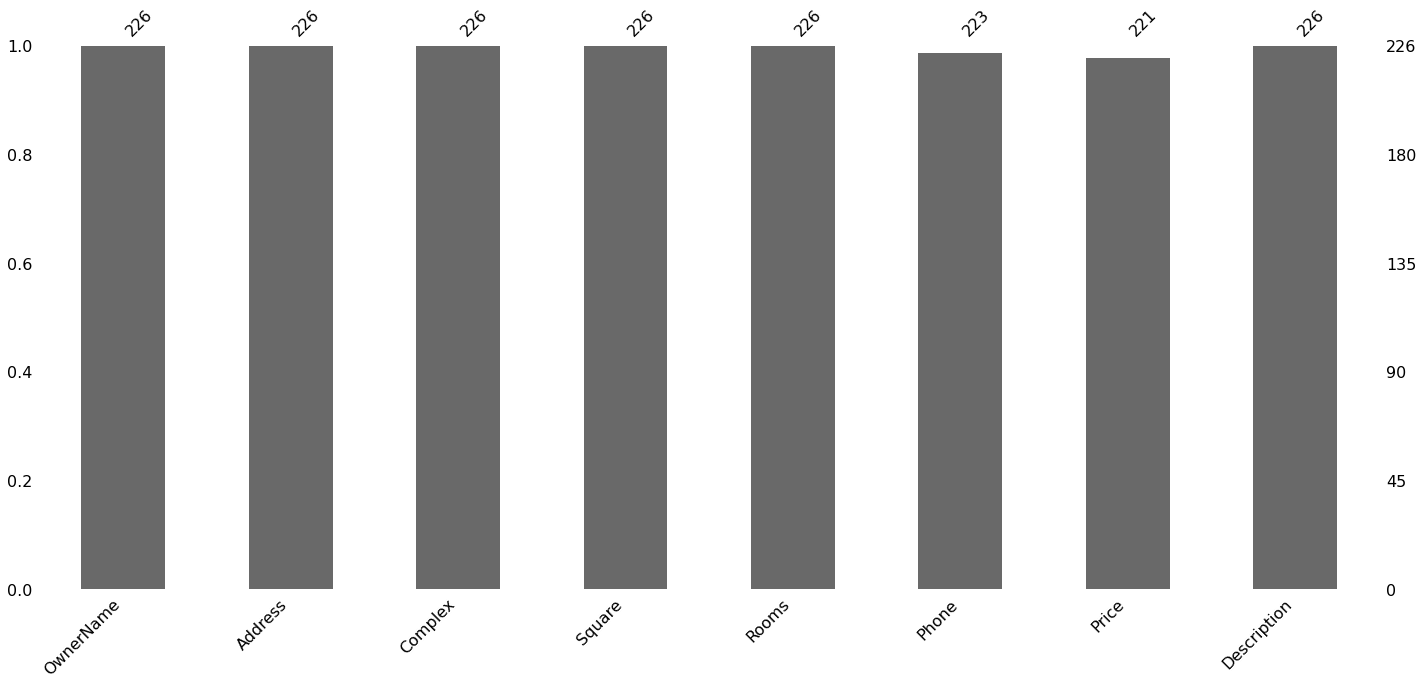

In [6]:
#checking for the number of non-null values
msno.bar(krisha)

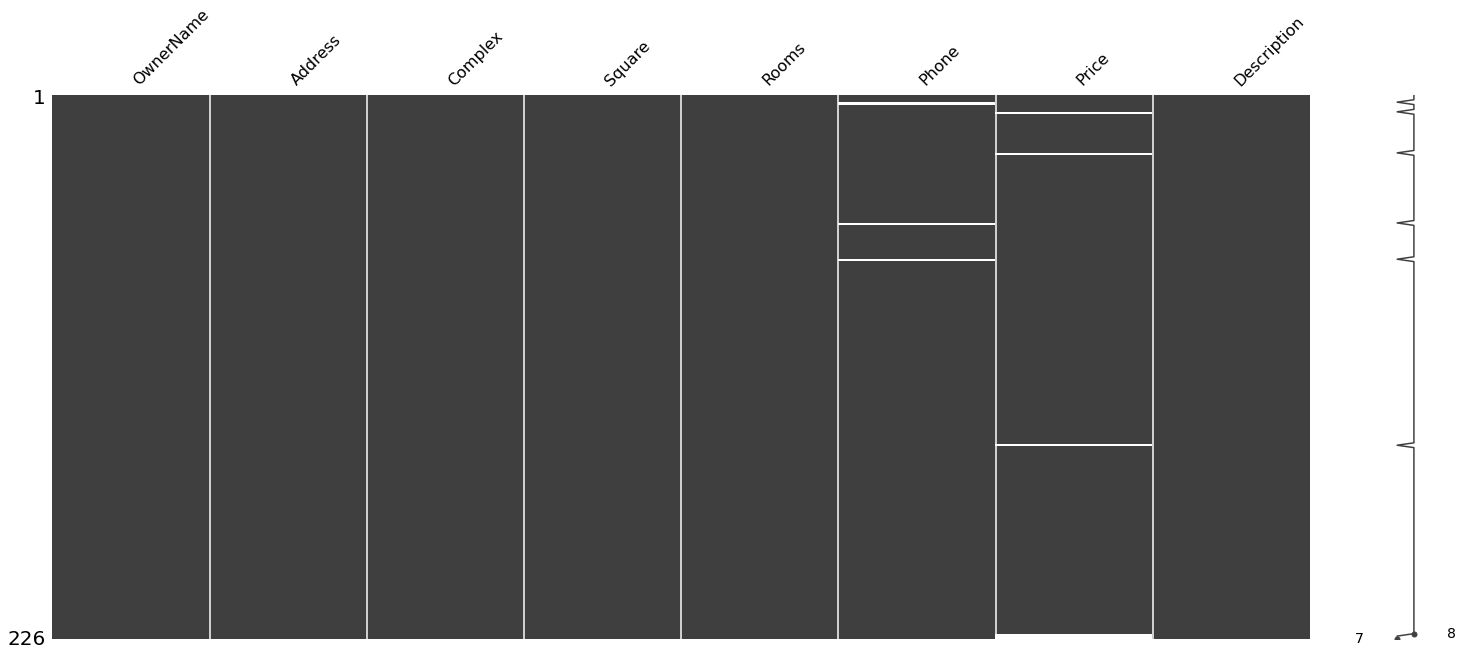

In [7]:
#visualizing NaN values
msno.matrix(krisha)

In [8]:
#we do not need Description, Address and Phone columns
#in addition, OwnerName and Complex columns have the same data, so we will drop oneof them

krisha = krisha.drop(["Description", "Address", "OwnerName", "Phone"], axis=1)
krisha

,Complex,Square,Rooms,Price
0,Асем Тас 2,101.10,3,44484000.0
1,Athletic,79.85,3,25552000.0
2,Atlant,100.42,3,44929027.0
3,Клубный дом Green House,74.92,2,31316560.0
4,Central Park,207.22,4,97393400.0
...,...,...,...,...
221,Cosmic City,98.98,3,23755200.0
222,Budapest,55.61,2,14458600.0
223,Жеруйык,128.22,4,37504350.0
224,Cosmic City,70.22,2,NaN


In [9]:
#now we need to deal with missing values on 'Price' column
krisha1 = krisha.copy()
krisha1['Price'].fillna((krisha1['Price'].mean()), inplace=True)

In [10]:
krisha1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Complex  226 non-null    object 
 1   Square   226 non-null    float64
 2   Rooms    226 non-null    int64  
 3   Price    226 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#checking dublicates
len(krisha1)-len(krisha1.drop_duplicates())

22

In [12]:
#dropping
krisha1.drop_duplicates()

,Complex,Square,Rooms,Price
0,Асем Тас 2,101.10,3,4.448400e+07
1,Athletic,79.85,3,2.555200e+07
2,Atlant,100.42,3,4.492903e+07
3,Клубный дом Green House,74.92,2,3.131656e+07
4,Central Park,207.22,4,9.739340e+07
...,...,...,...,...
221,Cosmic City,98.98,3,2.375520e+07
222,Budapest,55.61,2,1.445860e+07
223,Жеруйык,128.22,4,3.750435e+07
224,Cosmic City,70.22,2,2.774257e+07


### Feature Exploration

Let's check the variables that will be used in the prediction model:

+ Complex - the name of the apartment's complex, it is categorical data, and we will need to make it numerical to predict properly. Need to mention that complex name is important.
+ Square - the amount of squares of the apartment. This variable should affect our target variable. The higher the number of squeares is - the higher is the price.
+ Rooms - number of rooms of the apartment. Let's keep an eye on this variable, how much is it correlated with the above one? But I would say, more rooms = higher price.
+ Price - price of the apartment. Price is our target variable.

#### Complex

First of all, we need to check the Complex variable. Can we group some complex names? What if some of them are actually stand for the same place?

In [13]:
krisha1.groupby(['Complex'])['Price'].count()

Complex
AiSafi                     16
Athletic                   10
Atlant                     12
Baisanat                    4
Budapest                   12
Central Park                6
Cosmic City                23
Grand Opera                 6
Grand Turan                15
Highvill Ishim C            6
Inju City                   6
Liberty                     3
R'Club                     13
Sapsan                     11
ViewPark                   11
Алматау                     3
Асем Тас 2                  5
Жеруйык                    25
Клубный дом Green House     5
Научный                     6
Сенатор Park               14
София                       7
Эмир                        7
Name: Price, dtype: int64

Actually we do not have repeating complex names, so we remain them the same. Let's see if the price really depends on the complex.

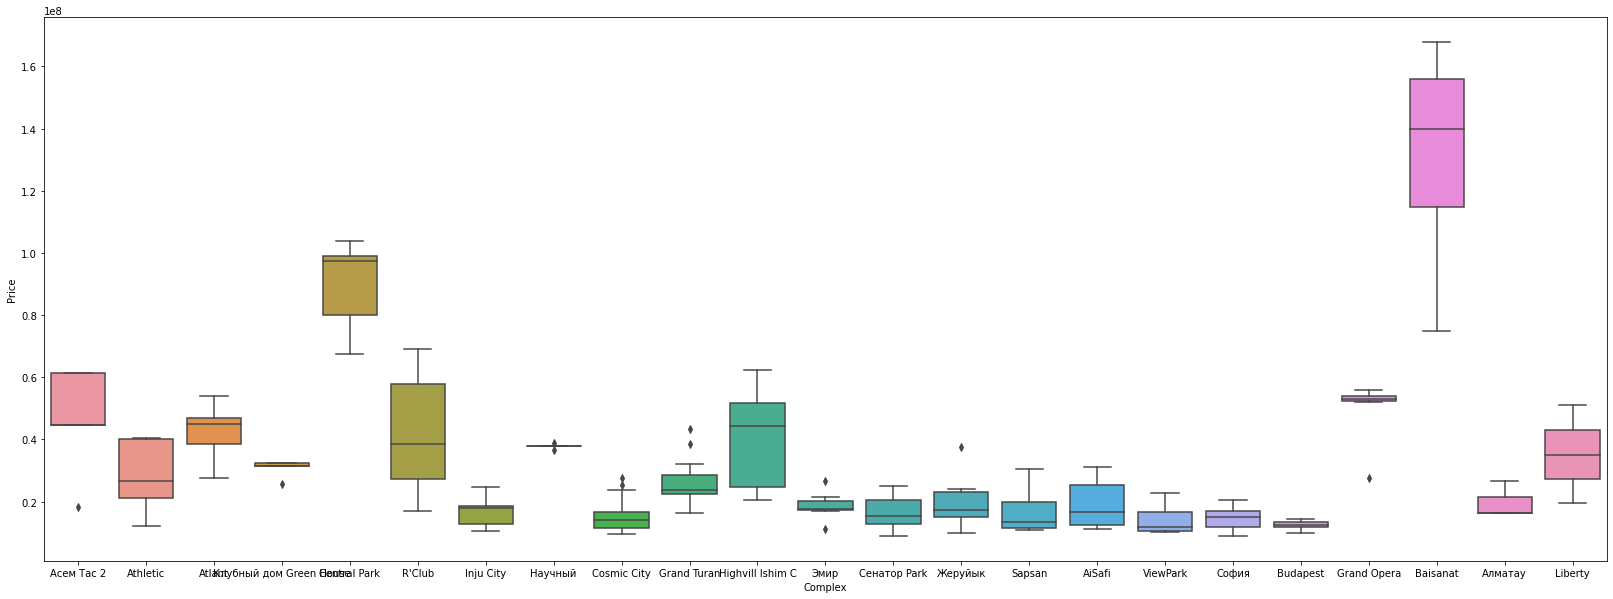

In [14]:
plt.figure(figsize=(28,10))
sns.boxplot(krisha1['Complex'], krisha1['Price']);

#### Square

Is it true that more squares the apartment has - higher price will be? From the following visualization we can see that it is NOT false.

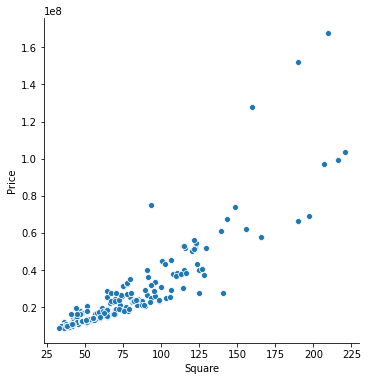

In [15]:
sns.pairplot(krisha1, x_vars=['Square'], 
             y_vars='Price', height=5, aspect=1, kind='scatter')
plt.show()

#### Room 

Just checking number of apartmants with certain number of rooms

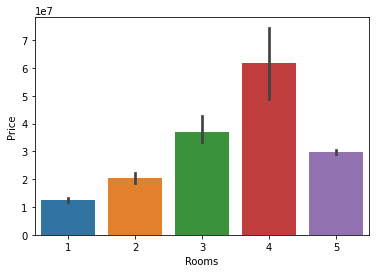

In [16]:
#checking the number of types
sns.barplot(krisha1['Rooms'], krisha1['Price']);

By the following box plots, it can be said that price does depend on the number of rooms, however, apartments with 5 rooms for some reason is cheaper that those with 4.

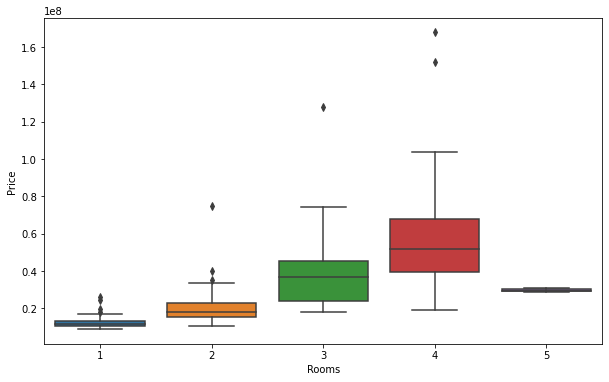

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(krisha1['Rooms'], krisha1['Price']);

Now we are ready to move to the main part with model prediction!

### Main Part

So, we have finished data cleaning.
Let me check dataframes and try to create the model.

In [18]:
krisha1.describe()

,Square,Rooms,Price
count,226.000000,226.000000,2.260000e+02
mean,79.665575,2.278761,2.774257e+07
std,39.293679,1.022933,2.272111e+07
min,32.740000,1.000000,8.905280e+06
25%,50.482500,1.000000,1.363339e+07
50%,68.930000,2.000000,1.956800e+07
75%,100.240000,3.000000,3.289909e+07
max,220.670000,5.000000,1.678560e+08


#### Model without preprocessing

In [19]:
start1 = time.time()

#let's convert cols to arrays
x = krisha1.drop(columns=['Complex','Price'])
y = krisha1['Price'].to_numpy()
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2,random_state =2)
model1 = LinearRegression().fit(x_train, y_train)

coef_det2 = model1.score(x_test, y_test)

print('Coefficient of determination is ', coef_det2) #success rate
print('Intercept:', model1.intercept_) #that is the predicted response when x is zero
print('Slope:', model1.coef_) #same but x is increased by one

pred1 = model1.predict(x_test)
print('Predicted response: ')
print(pred1)

print('Actual price is 25,552,000 tenge')
print('Predicted price is',model1.predict([[79.85, 3]])
      ,'tenge')

time1 = time.time()-start1
print('That was predicted by', time1, 'seconds')

Coefficient of determination is  0.8187943592873461
Intercept: -9572565.111289334
Slope: [  645811.52363774 -6212538.4676691 ]
Predicted response: 
[2.61606917e+07 5.35876570e+06 2.83239919e+07 1.00602736e+07
 2.14073505e+07 3.66422127e+07 2.95382859e+07 2.12198967e+07
 7.57389923e+06 1.95732457e+07 6.76928307e+07 2.92282964e+07
 7.50938308e+07 9.76965841e+06 4.47665217e+07 1.53044316e+07
 1.69254185e+07 2.82728321e+07 9.14967935e+06 2.99385207e+07
 2.60378191e+07 3.23151071e+07 1.29084708e+07 1.57046663e+07
 3.62815921e+06 1.46713679e+07 2.27701812e+07 2.49528557e+07
 2.91633785e+07 7.12845767e+06 2.66965468e+07 2.83239919e+07
 2.63865573e+07 1.53430119e+07 2.81237903e+07 2.30735442e+07
 1.32764150e+07 1.05137151e+08 4.63747607e+07 4.63747607e+07
 4.92292477e+07 1.83009970e+07 2.22210730e+07 4.74920147e+07
 8.62657201e+06 7.87362078e+07]
Actual price is 25,552,000 tenge
Predicted price is [23357869.64817653] tenge
That was predicted by 0.034549713134765625 seconds


#### Dummy feature

In [20]:
#let's add dummies preprocessing 
#we do not need complex names, we can't train data with it

dummi1 = pd.get_dummies(krisha1['Complex'])

In [21]:
#let's merge it with original dataset

merged1 = pd.concat([krisha1, dummi1], axis='columns')

In [22]:
#let's drop complex names column now

final1 = merged1.drop(['Complex'], axis='columns')

In [23]:
start2 = time.time()

x = final1.drop(columns=['Price'])
y = final1['Price'].to_numpy()
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2,random_state =2)

#creating model and fitting it
model3 = LinearRegression().fit(x_train, y_train)

#coefficient of our model
coef_det4 = model3.score(x_test, y_test)
print('Coefficient of determination is ', coef_det4)
print('Intercept:', model3.intercept_) 
print('Slope:', model3.coef_) 
pred3 = model3.predict(x_test)
print('Actual price is 25,552,000 tenge')
print('Predicted price is',model3.predict([[79.85, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
      ,'tenge')

time2 = time.time()-start2
print('That was predicted by', time2, 'seconds')

Coefficient of determination is  0.9896617135482264
Intercept: 2305527.5398322605
Slope: [   452616.31230888  -3181025.6973654   -5089533.64899366
  -6223330.81650359   4793708.6644197   65415875.32718594
  -6760880.93341189  13007314.38968063  -9252557.16699811
   2012955.10898965  -2765793.76108483   2198187.25287027
  -5867024.11315905   3270432.79718489  -6982797.77803355
  -8120028.23314661  -7863046.25430379  -2139426.95154451
   5442137.90866224  -6232789.70434303   1463069.73671758
  -5974527.67617726 -10082222.20309003  -8737676.92589685
  -5512045.01902407]
Actual price is 25,552,000 tenge
Predicted price is [22680532.16909622] tenge
That was predicted by 0.03621506690979004 seconds


In [24]:
print('Success rate of model with dropped filled by mean values:')
data1 = {'Before Preprocessing':  [coef_det2*100],
        'With Dummies': [coef_det4*100]
        }

df1 = pd.DataFrame(data1, columns = ['Before Preprocessing', 'With Dummies'])
df1

Success rate of model with dropped filled by mean values:


,Before Preprocessing,With Dummies
0,81.879436,98.966171


#### Feature selection

I used Pearson's correlation for the feature selection

In [25]:
x_train.shape, x_test.shape

((180, 25), (46, 25))

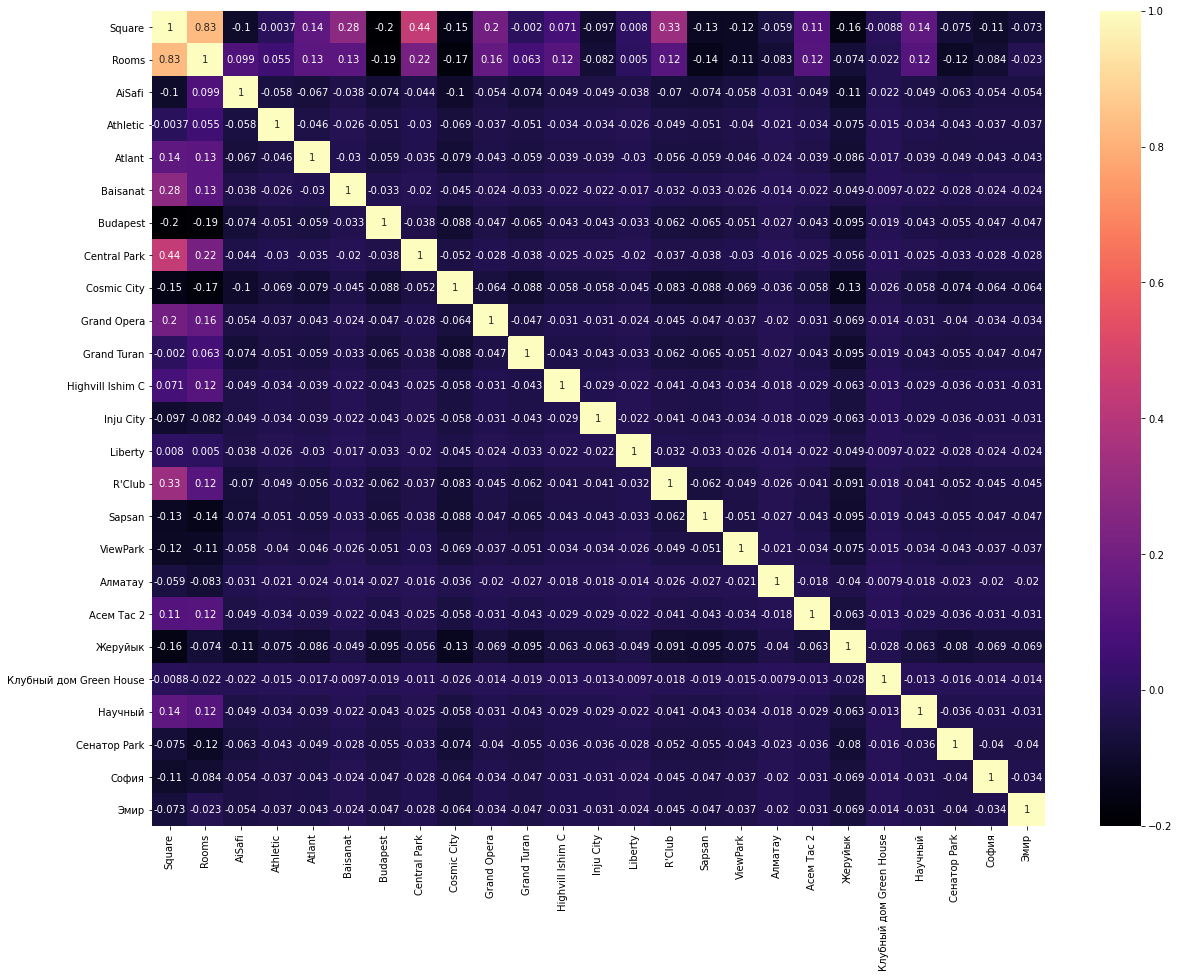

In [26]:
plt.figure(figsize=(20,15))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.magma)
plt.show()

In [27]:
def correlate(data, threshold):
    col_corr = set()  # setting all the names of columns
    corr_matrix = data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  #getting the name of column, where we have high corr
                col_corr.add(colname)
                
    return col_corr

In [28]:
features_to_drop = correlate(x_train, 0.6)
len(set(features_to_drop))

1

In [29]:
features_to_drop

{'Rooms'}

In [30]:
x_train = x_train.drop(features_to_drop,axis=1)
x_test = x_test.drop(features_to_drop,axis=1)
x_train.head(10)

,Square,AiSafi,Athletic,Atlant,Baisanat,Budapest,Central Park,Cosmic City,Grand Opera,Grand Turan,...,Sapsan,ViewPark,Алматау,Асем Тас 2,Жеруйык,Клубный дом Green House,Научный,Сенатор Park,София,Эмир
71,77.45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100.42,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,121.87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
183,63.64,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
115,102.53,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,48.76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
173,59.78,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
84,96.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,44.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
start3 = time.time()
#creating model and fitting it
model4 = LinearRegression().fit(x_train, y_train)

#coefficient of our model
coef_det5 = model4.score(x_test, y_test)
print('Coefficient of determination is ', coef_det5)
print('Intercept:', model4.intercept_) 
print('Slope:', model4.coef_) 
pred4 = model4.predict(x_test)

time3 = time.time()-start3
print('That was predicted by', time3, 'seconds')

Coefficient of determination is  0.9906631715769498
Intercept: 3240402.158806663
Slope: [   354720.88527549  -8011562.49962319  -7621168.98831053
   4871648.11308191  69973874.14791232  -7848917.66704229
  19200406.70903926  -9796314.10480618   2922295.41731191
  -4040057.08744397   1122503.93579376  -6936741.35866071
   2936674.08401378  -3865343.50980606  -8648532.42988999
  -8694423.49402266  -2216853.0621476    5284322.11545073
  -7632709.84642931   1500469.11635337  -5409875.21788241
 -10128667.33387276  -9894208.22580311  -7066818.81321638]
That was predicted by 0.018563270568847656 seconds


In [32]:
print('Success rate (%) of model before preprocessing, after prep, after feature selection:')
data1 = {'Before Preprocessing':  [coef_det2*100],
        'With Dummies': [coef_det4*100],
        'With feature selection': [coef_det5*100]
        }

df1 = pd.DataFrame(data1, columns = ['Before Preprocessing', 'With Dummies', 'With feature selection'])
df1

Success rate (%) of model before preprocessing, after prep, after feature selection:


,Before Preprocessing,With Dummies,With feature selection
0,81.879436,98.966171,99.066317


In [33]:
print('Spent time (in seconds) of model before preprocessing, after prep, after feature selection:')
data2 = {'Before Preprocessing':  [time1],
        'With Dummies': [time2],
        'With feature selection': [time3]
        }

df2 = pd.DataFrame(data2, columns = ['Before Preprocessing', 'With Dummies', 'With feature selection'])
df2

Spent time (in seconds) of model before preprocessing, after prep, after feature selection:


,Before Preprocessing,With Dummies,With feature selection
0,0.03455,0.036215,0.018563



For now, let me compare models before preprocessing, after preprocessing and after feature selection:
+ The success rate of the prediction was increased significantly by implementing preprocessing.
+ With preprocessing the prediction became more accurate (as the success rate went up).

At the start, success rate was 81%. After adding Dummies feature it became 98%. Thus, our predictions are much more successful that they were in the past. With feature selection it became 99%.

<br>

However, talking about time, we must mention that feature made the model 2 times faster!

### Conclusion

To conclude, for this analysis the regression model with preprocessing (Dummy feature by built-in functions) and feature selection (Pearson's correlation) was used. Data preparation, dealing with missing values, data exploraion, preprocessing, creation of models, data visualization, analysis were done. 

Recorded score: 95